In [196]:
!date

Thu Nov 19 11:33:30 PST 2020


# Sex specific assignments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
import anndata

def nd(arr):
    return np.asarray(arr).reshape(-1)

import sys
sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/trackfig')
from trackfig.utils import get_notebook_name
from trackfig.trackfig import trackfig 

TRACKFIG = "/home/sina/projects/mop/BYVSTZP_2020/trackfig.txt"
NB = get_notebook_name()

fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [2]:
def violinplot(data, ax, **kwd): 
    xticklabels = kwd.get("xticklabels", [])
    xticks = kwd.get("xticks", [])
    selected = kwd.get("selected", None)
    color = kwd.get("color", "grey")
    
    if  len(xticks)==0: xticks = np.arange(len(data))+1;
    if  len(xticklabels)==0: xticklabels = np.arange(len(data))+1;
    assert(len(xticks) == len(xticklabels))
        
    violins = ax.violinplot(data, positions=xticks, showmeans=False, showmedians=False, showextrema=False)
    
    for vidx, v in enumerate(violins['bodies']):
        v.set_facecolor(color)
        v.set_edgecolor('black')
        v.set_alpha(1)
        if selected == vidx:
            v.set_facecolor("#D43F3A")

            
    
    for didx, d in enumerate(data):
        x = xticks[didx]
        xx = np.random.normal(x, 0.04, size=len(d))
        
        # actual points
        ax.scatter(xx, d, s = 5, color="white", edgecolor="black", linewidth=1)
        
        # mean and error bars
        mean = np.mean(d)
        stdev = np.sqrt(np.var(d))
        ax.scatter(x, mean, color="lightgrey", edgecolor="black", linewidth=1, zorder=10)    
        ax.vlines(x, mean - stdev, mean+stdev, color='lightgrey', linestyle='-', lw=2, zorder=9)
        
    ax.set(**{"xticks": xticks, "xticklabels":xticklabels})
    #ax.set_xticklabels(labels, rotation=45, ha="right")

    
    return ax


In [162]:
gene = anndata.read_h5ad("../../data/notebook/revision/10xv3_gene_tsne_new.h5ad")

md = pd.read_csv("../../reference/10xv3_cluster_labels/sample_metadata.csv", index_col = 0)
md["sex"] = md["Gender"].apply(lambda x: {"Male": "M", "Female":"F"}.get(x, "X"))

gene.obs["sex"] = gene.obs.index.map(md["sex"]).values
gene.obs["date"] = gene.obs.index.map(md["Amp_Date"]).values

In [163]:
gene

AnnData object with n_obs × n_vars = 71365 × 24575
    obs: 'batch', 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'subclass_id', 'class_id', 'sex', 'date', 'cell_counts', 'percent_mito', 'n_genes', 'pass_count_filter'
    var: 'gene_name', 'gene_id', 'gene_short_name', 'gene_counts', 'dispersion', 'pass_disp_filter', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_tsne'
    layers: 'X', 'log1p', 'norm'

In [114]:
md.sex.value_counts()

F    89799
M    86785
Name: sex, dtype: int64

In [115]:
m_mask = gene.obs.eval("sex == 'M'").values
f_mask = gene.obs.eval("sex == 'F'").values

In [116]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(gene.obs.groupby("subclass_label")["sex"].value_counts())

subclass_label  sex
Astro           F        198
                M        183
Endo            M        109
                F         77
L2/3 IT         F       5593
                M       5322
L5 IT           F      15565
                M      14156
L5 PT           M         78
                F         52
L5/6 NP         F       1724
                M       1423
L6 CT           F       7005
                M       5802
L6 IT           F       2535
                M       1910
L6 IT Car3      M         44
                F         25
L6b             F        464
                M         90
Lamp5           M       1321
                F       1036
Macrophage      F         64
                M         58
OPC             M         74
                F         70
Oligo           F        262
                M        258
Pvalb           F        212
                M        156
SMC             M          8
                F          3
Sncg            F        177
                M      

In [117]:
gene.obs.sex.value_counts()

F    37691
M    33674
Name: sex, dtype: int64

In [118]:
gene.obs["date"] = gene.obs.index.map(md["Amp_Date"]).values

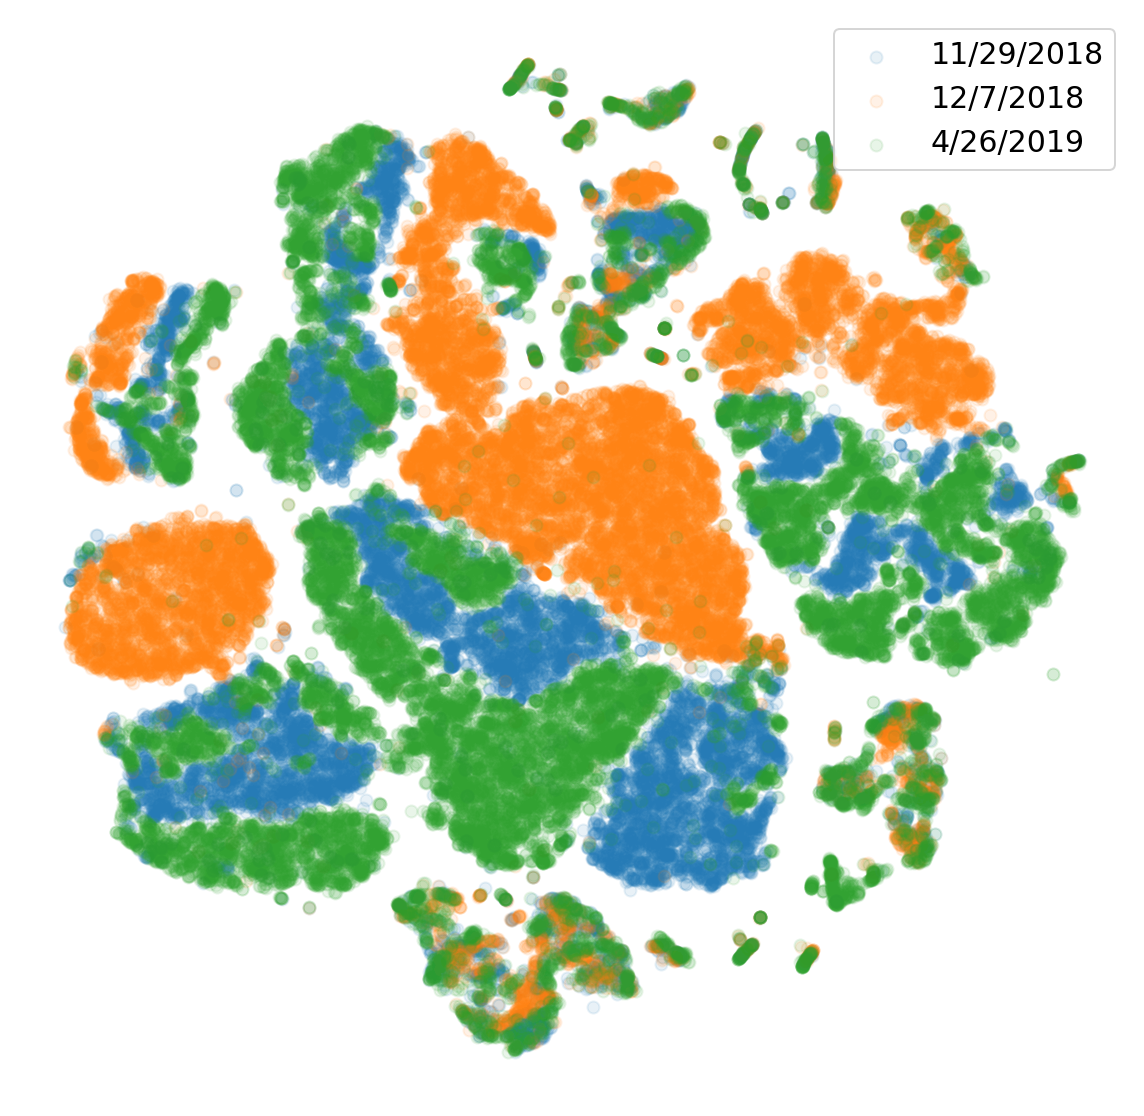

In [120]:
fig, ax = plt.subplots(figsize=(10,10))

X = gene.obsm["X_tsne"]
for d in gene.obs["date"].unique():
    mask = gene.obs.eval(f"date == '{d}'").values
    x = X[:,0][mask]
    y = X[:,1][mask]

    ax.scatter(x,y, label=f"{d}", alpha=0.1)

ax.set_axis_off()
ax.legend()

plt.savefig(trackfig("../../figures/date_10x_gene_tsne.png", TRACKFIG, NB), bbox_inches='tight', dpi=300)

fig.show()

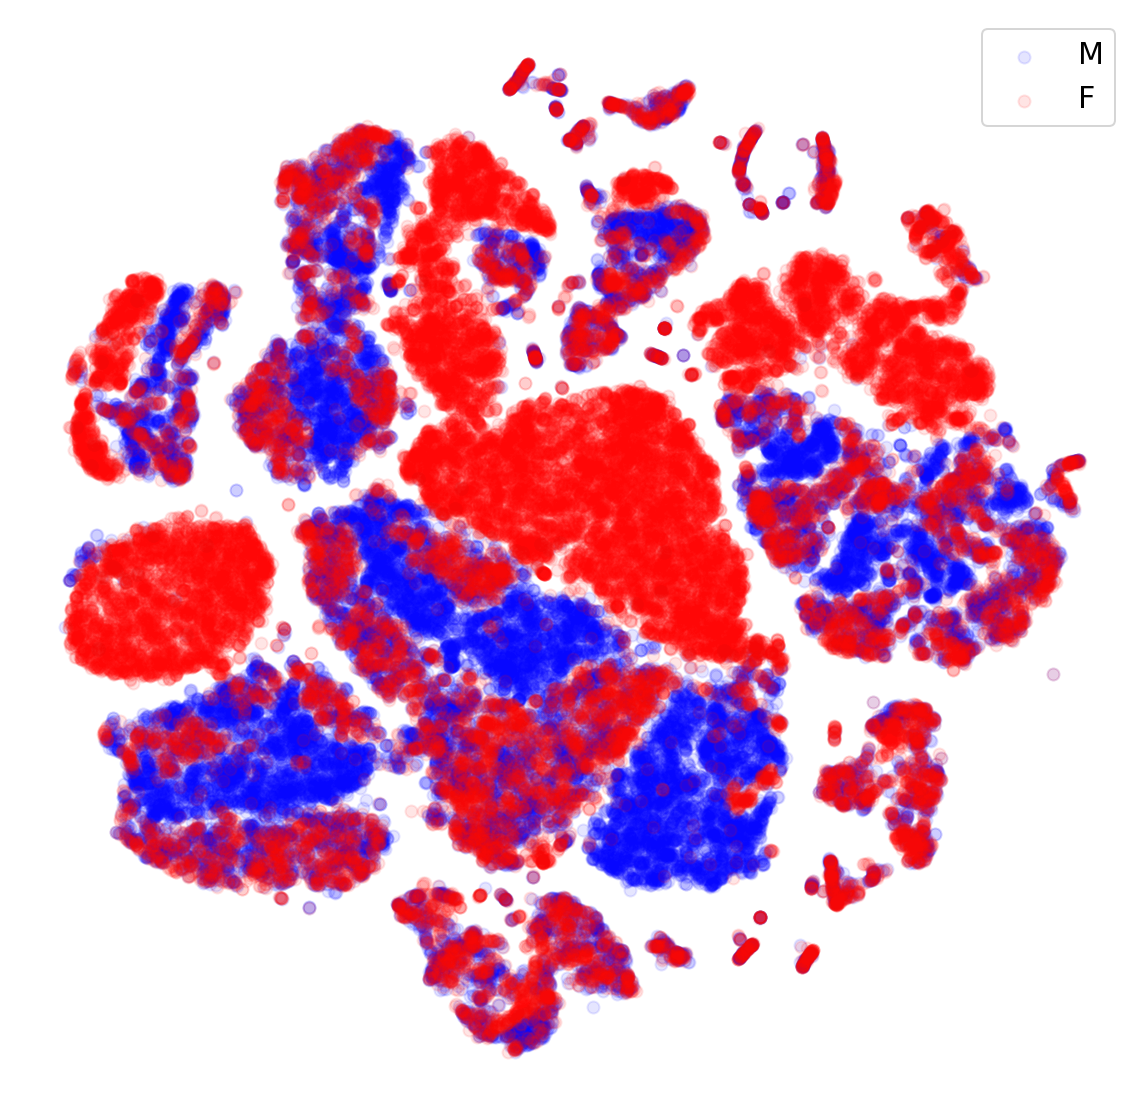

In [166]:
fig, ax = plt.subplots(figsize=(10,10))

X = gene.obsm["X_tsne"]

for d in gene.obs["sex"].unique():
    mask = gene.obs.eval(f"sex == '{d}'").values
    if d == 'M':
        color = 'blue'
    elif d =='F':
        color="red"
    x = X[:,0][mask]
    y = X[:,1][mask]

    ax.scatter(x,y, color=color,label=f"{d}", alpha=0.1)

ax.set_axis_off()
ax.legend()

plt.savefig(trackfig("../../figures/male_female_10x_gene_tsne.png", TRACKFIG, NB), bbox_inches='tight', dpi=300)

fig.show()

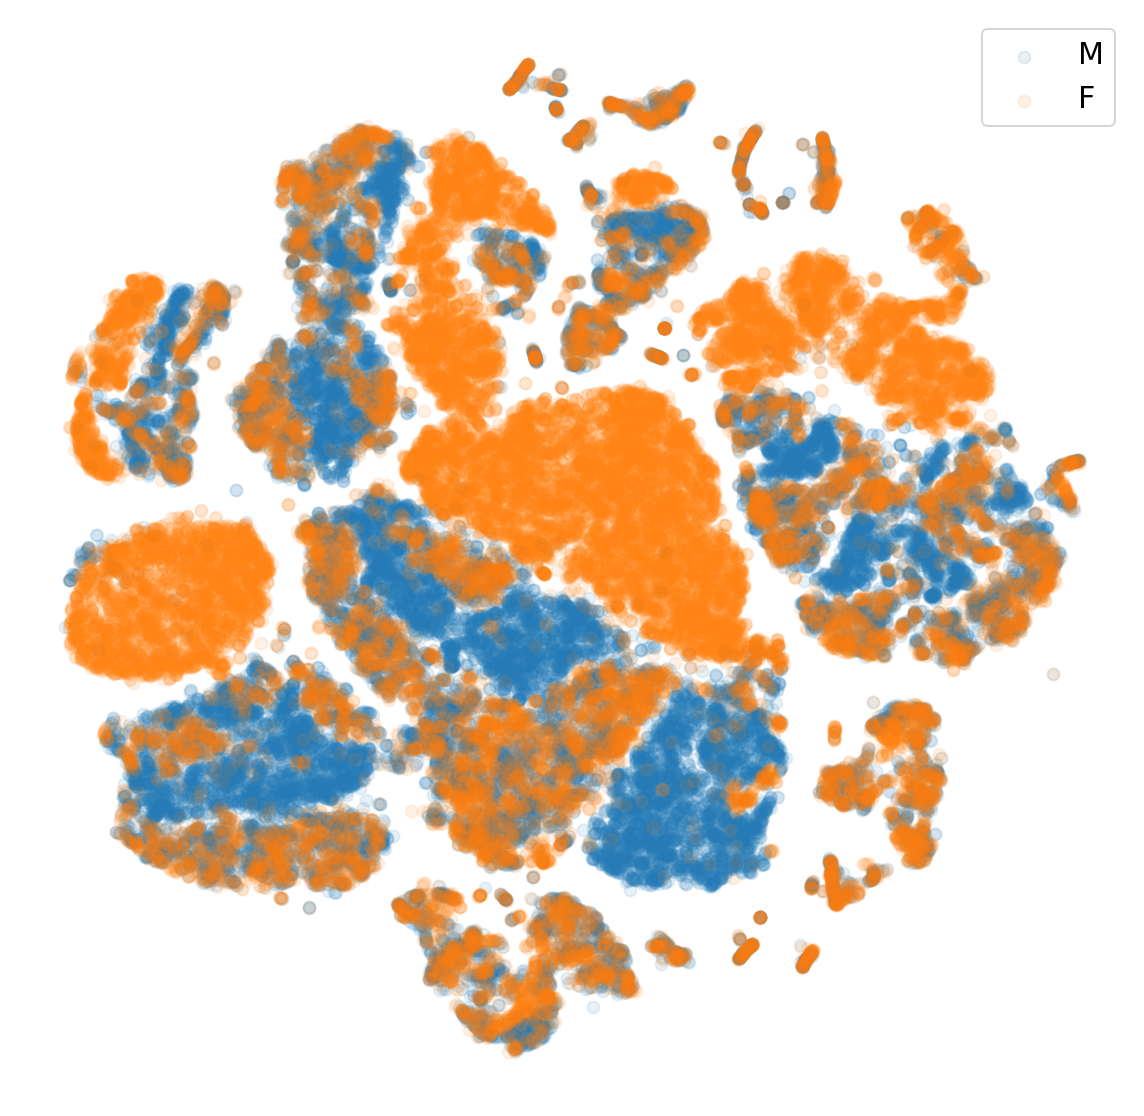

In [122]:
fig, ax = plt.subplots(figsize=(10,10))

X = gene.obsm["X_tsne"]
for d in gene.obs["sex"].unique():
    mask = gene.obs.eval(f"sex == '{d}'").values
    x = X[:,0][mask]
    y = X[:,1][mask]

    ax.scatter(x,y, label=f"{d}", alpha=0.1)

ax.set_axis_off()
ax.legend()

#plt.savefig(trackfig("../../figures/male_female_10x_gene_tsne.png", TRACKFIG, NB), bbox_inches='tight', dpi=300)

fig.show()

# Fractions of sex per grouping

In [123]:
df = (gene.obs.groupby("subclass_label")["sex"].value_counts()/gene.obs.groupby("subclass_label")["sex"].count()).unstack().fillna(0)

df = df.sort_values("M", ascending=False)

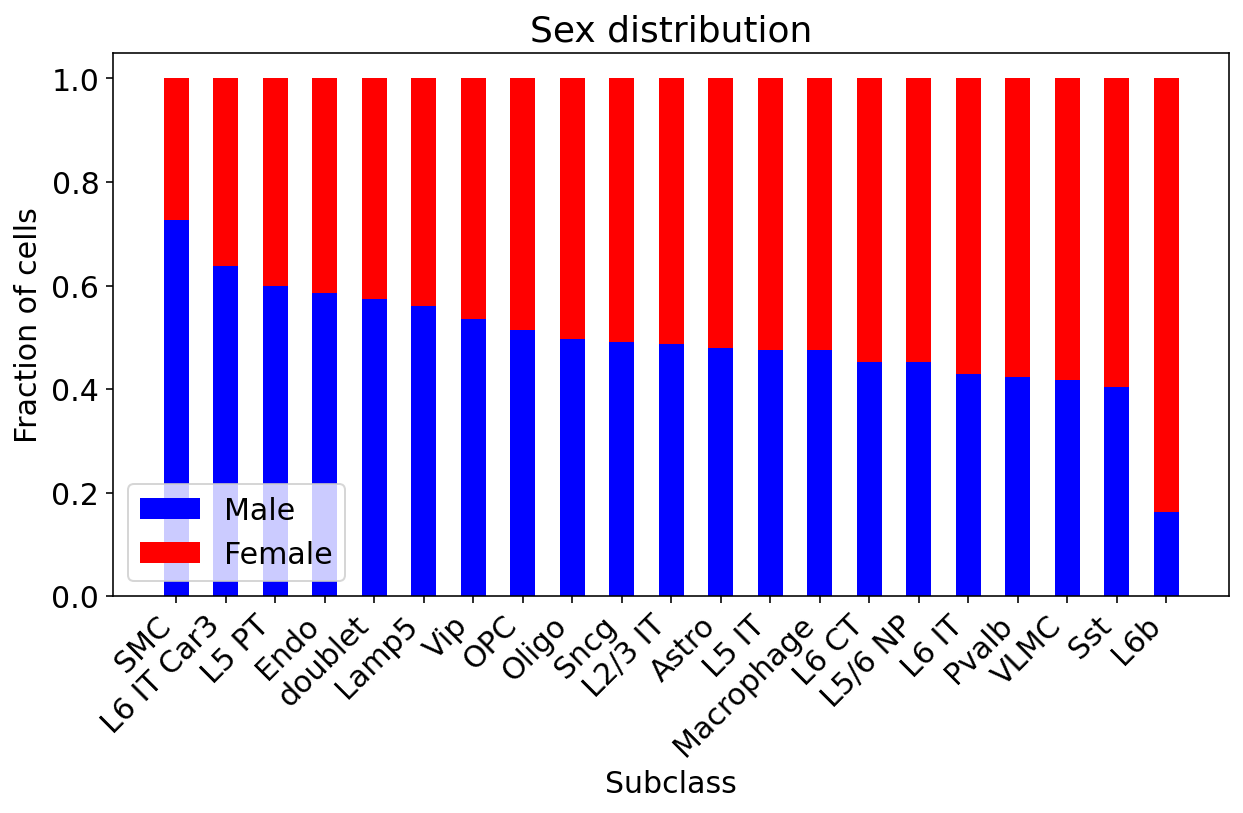

In [124]:
fig, ax = plt.subplots(figsize=(10,5))

labels = df.index.values
width = 0.5

ax.bar(labels, df["M"].values, width, color="blue", label="Male")
ax.bar(labels, df["F"].values, width, bottom=df["M"].values, color="red", label="Female")

ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend(loc="lower left")

ax.set(**{
    "title": "Sex distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Subclass"
})

#plt.savefig(trackfig("../../figures/subclass_sex_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

In [125]:
df = (gene.obs.groupby("cluster_label")["sex"].value_counts()/gene.obs.groupby("cluster_label")["sex"].count()).unstack().fillna(0)

df = df.sort_values("M", ascending=False)

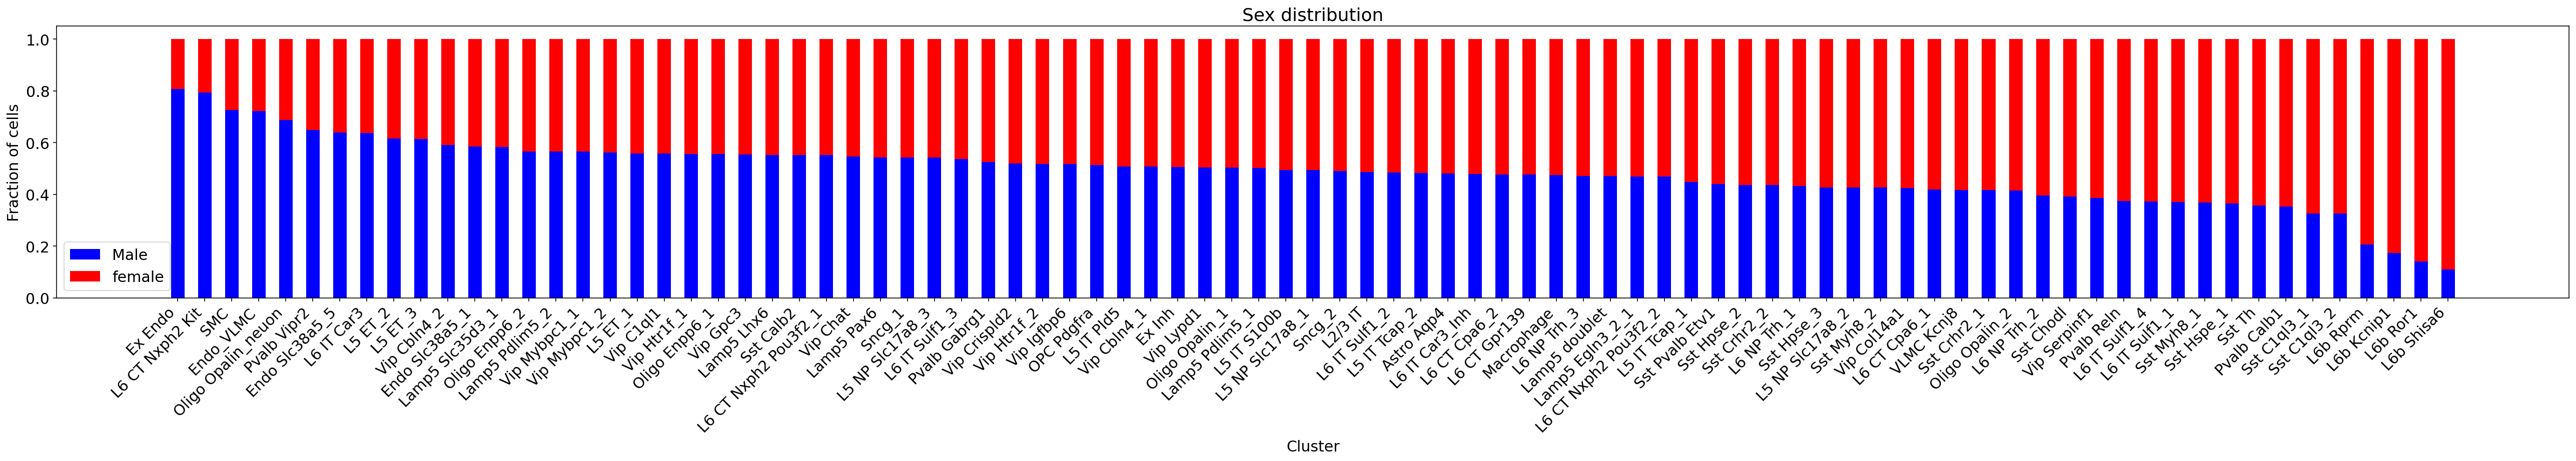

In [126]:
fig, ax = plt.subplots(figsize=(45,5))

labels = df.index.values
width = 0.5

ax.bar(labels, df["M"].values, width, color="blue", label="Male")
ax.bar(labels, df["F"].values, width, bottom=df["M"].values, color="red", label="female")

ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend(loc="lower left")

ax.set(**{
    "title": "Sex distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Cluster"
})

#plt.savefig(trackfig("../../figures/cluster_sex_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

# Comparable fractions

## Subclass

In [152]:
chosen = gene[gene.obs.eval("date == '4/26/2019'").values]

In [153]:
df = (chosen.obs.groupby("subclass_label")["sex"].value_counts()/chosen.obs.groupby("subclass_label")["sex"].count()).unstack().fillna(0)

df = df.sort_values("M", ascending=False)

In [154]:
fr_m, fr_f = gene.obs["sex"].value_counts()/gene.obs["sex"].value_counts().sum()

df["adj_F"] = df["F"].apply(lambda x: x/fr_f)
df["adj_M"] = df["M"].apply(lambda x: x/fr_m)

df["norm_F"] = df["adj_F"]/(df["adj_F"] + df["adj_M"])
df["norm_M"] = df["adj_M"]/(df["adj_F"] + df["adj_M"])

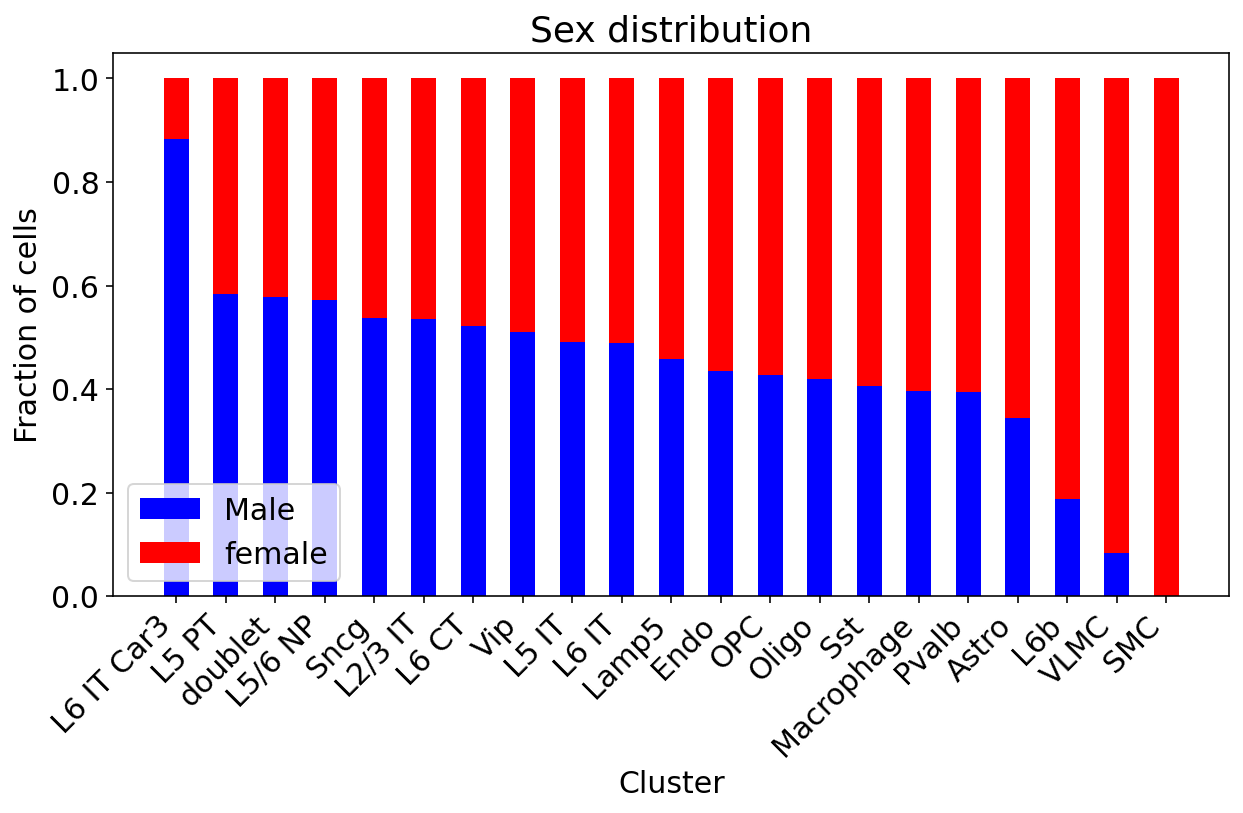

In [155]:
fig, ax = plt.subplots(figsize=(10,5))

labels = df.index.values
width = 0.5

ax.bar(labels, df["norm_M"].values, width, color="blue", label="Male")
ax.bar(labels, df["norm_F"].values, width, bottom=df["norm_M"].values, color="red", label="female")

ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend(loc="lower left")

ax.set(**{
    "title": "Sex distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Cluster"
})

#plt.savefig(trackfig("../../figures/cluster_sex_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

In [157]:
df["n"] = df.index.map(gene.obs.subclass_label.value_counts())

In [159]:
df.to_csv("../../data/notebook/revision/10x_subclass_sex_ratio.csv")

## Cluster

In [132]:
df = (gene.obs.groupby("cluster_label")["sex"].value_counts()/gene.obs.groupby("cluster_label")["sex"].count()).unstack().fillna(0)

df = df.sort_values("M", ascending=False)

In [133]:
fr_m, fr_f = gene.obs["sex"].value_counts()/gene.obs["sex"].value_counts().sum()

df["adj_F"] = df["F"].apply(lambda x: x/fr_f)
df["adj_M"] = df["M"].apply(lambda x: x/fr_m)

df["norm_F"] = df["adj_F"]/(df["adj_F"] + df["adj_M"])
df["norm_M"] = df["adj_M"]/(df["adj_F"] + df["adj_M"])

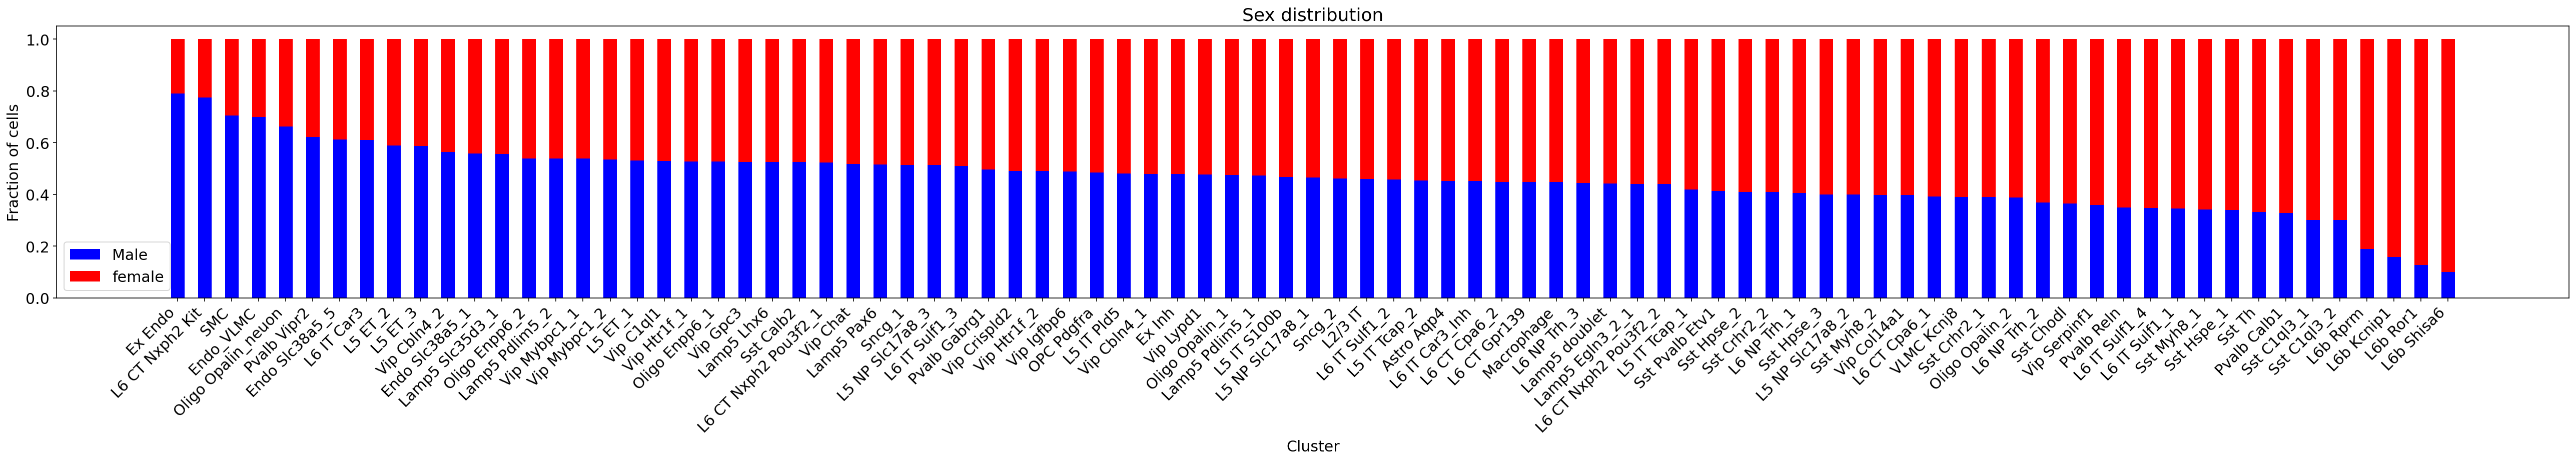

In [134]:
fig, ax = plt.subplots(figsize=(45,5))

labels = df.index.values
width = 0.5

ax.bar(labels, df["norm_M"].values, width, color="blue", label="Male")
ax.bar(labels, df["norm_F"].values, width, bottom=df["norm_M"].values, color="red", label="female")

ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend(loc="lower left")

ax.set(**{
    "title": "Sex distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Cluster"
})

#plt.savefig(trackfig("../../figures/cluster_sex_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

# By date

In [135]:
gene.obs.groupby("date")["sex"].value_counts()

date        sex
11/29/2018  M      19212
12/7/2018   F      25308
4/26/2019   M      14462
            F      12383
Name: sex, dtype: int64

In [136]:
df = (gene.obs.groupby("cluster_label")["date"].value_counts()/gene.obs.groupby("cluster_label")["date"].count()).unstack().fillna(0)

df = df.sort_values(["4/26/2019", "12/7/2018"], ascending=False)

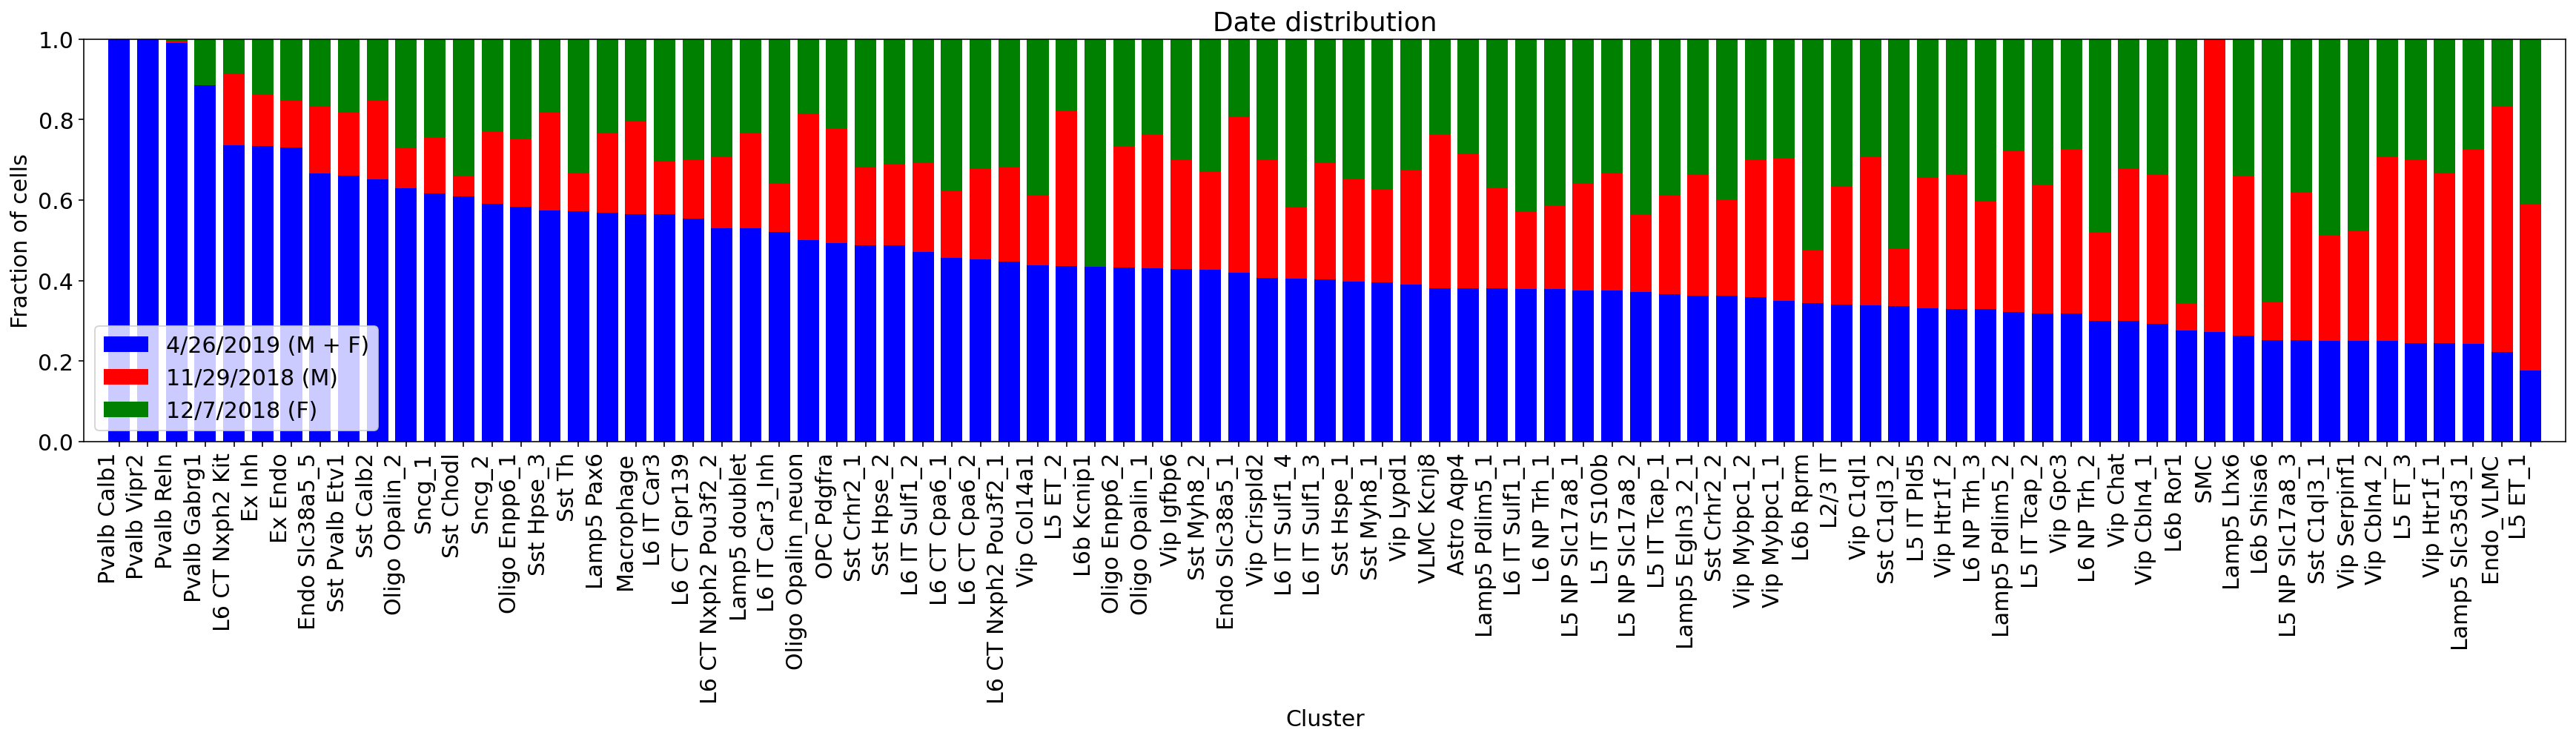

In [140]:
fig, ax = plt.subplots(figsize=(30,5))

labels = df.index.values
width = 0.75

ax.bar(labels, df["4/26/2019"].values, width, color="blue", label="4/26/2019 (M + F)")
ax.bar(labels, df["11/29/2018"].values, width, bottom=df["4/26/2019"].values, color="red", label="11/29/2018 (M)")
ax.bar(labels, df["12/7/2018"].values, width, bottom=df["11/29/2018"].values + df["4/26/2019"].values, color="green", label="12/7/2018 (F)")

ax.set_xticklabels(labels, rotation = 90, ha="right")
ax.legend(loc="lower left")

ax.set(**{
    "title": "Date distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Cluster"
})
ax.margins(x=0.01)


plt.savefig(trackfig("../../figures/10x_cluster_date_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

In [141]:
md.groupby("Amp_Date")["sex"].value_counts()

Amp_Date    sex
11/29/2018  M      60381
12/7/2018   F      54779
4/26/2019   F      35020
            M      26404
Name: sex, dtype: int64

In [142]:
df = (gene.obs.groupby("subclass_label")["date"].value_counts()/gene.obs.groupby("subclass_label")["date"].count()).unstack().fillna(0)

df = df.sort_values(["4/26/2019", "12/7/2018"], ascending=False)

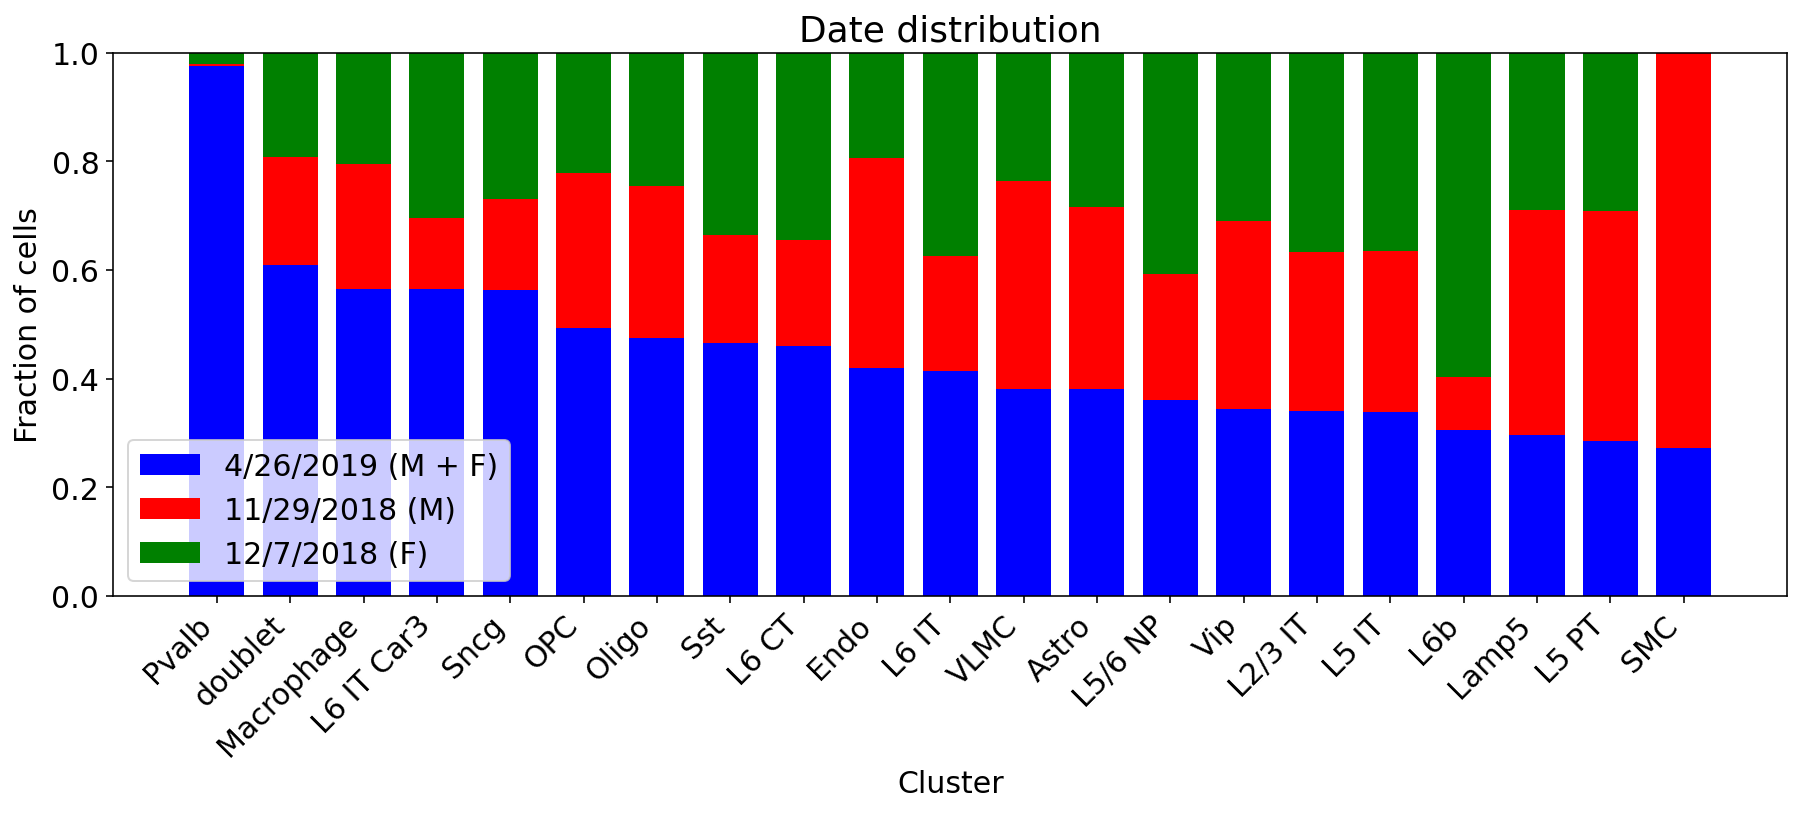

In [143]:
fig, ax = plt.subplots(figsize=(15,5))

labels = df.index.values
width = 0.75

ax.bar(labels, df["4/26/2019"].values, width, color="blue", label="4/26/2019 (M + F)")
ax.bar(labels, df["11/29/2018"].values, width, bottom=df["4/26/2019"].values, color="red", label="11/29/2018 (M)")
ax.bar(labels, df["12/7/2018"].values, width, bottom=df["11/29/2018"].values + df["4/26/2019"].values, color="green", label="12/7/2018 (F)")

ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend(loc="lower left")

ax.set(**{
    "title": "Date distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Cluster"
})

#plt.savefig(trackfig("../../figures/cluster_sex_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

In [144]:
df = (gene.obs.groupby("class_label")["date"].value_counts()/gene.obs.groupby("class_label")["date"].count()).unstack().fillna(0)

df = df.sort_values(["4/26/2019", "12/7/2018"], ascending=False)

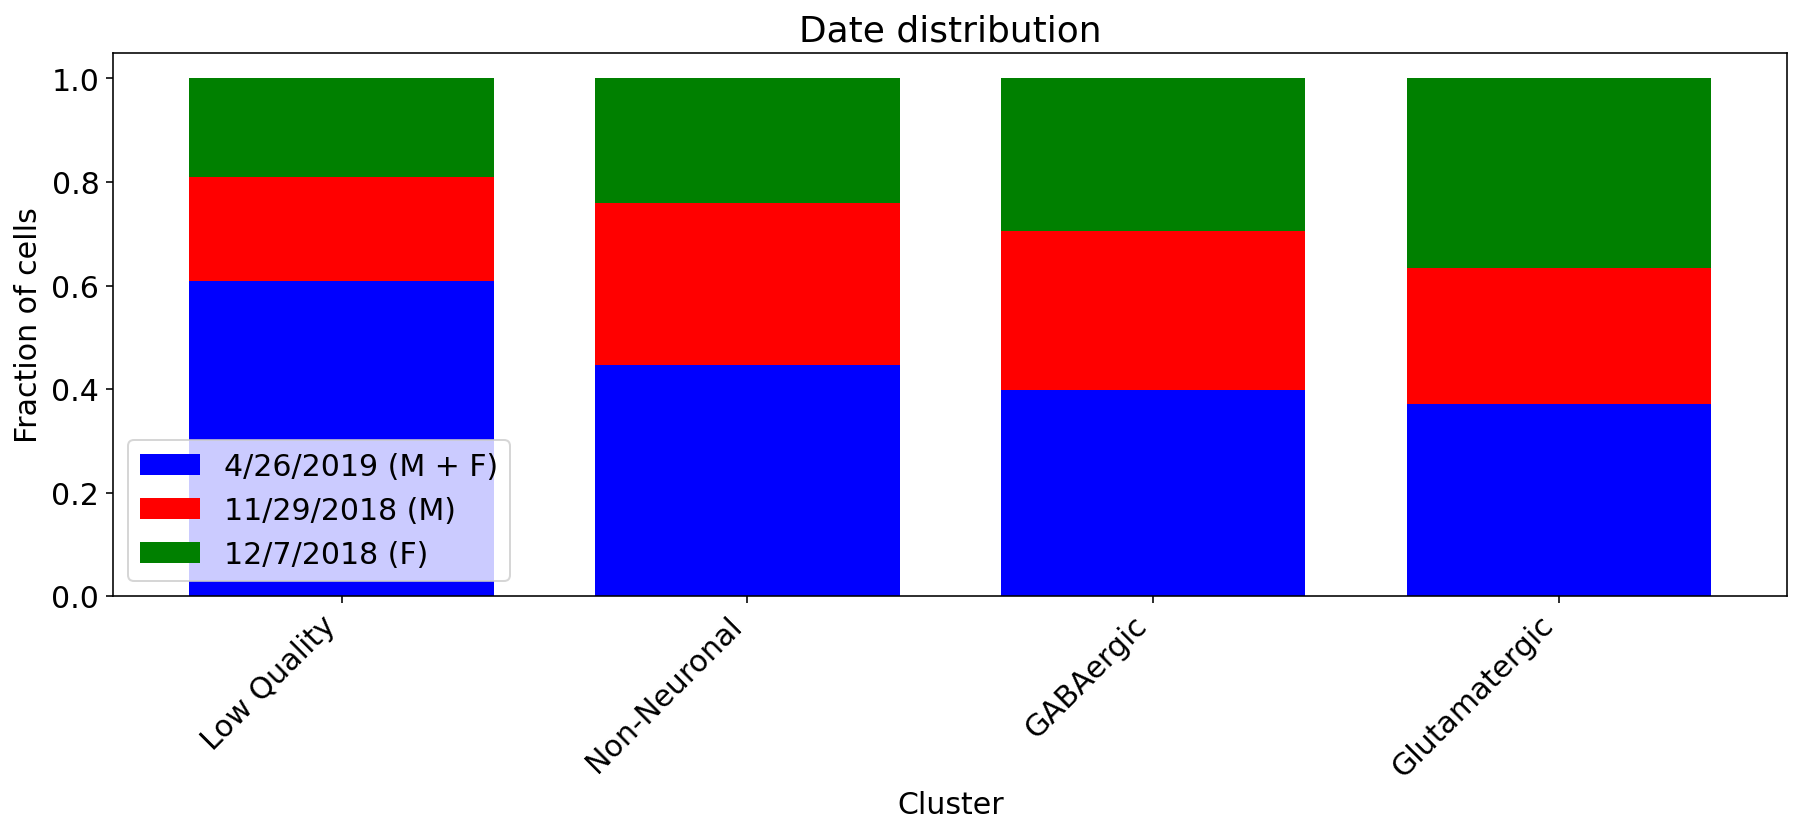

In [145]:
fig, ax = plt.subplots(figsize=(15,5))

labels = df.index.values
width = 0.75

ax.bar(labels, df["4/26/2019"].values, width, color="blue", label="4/26/2019 (M + F)")
ax.bar(labels, df["11/29/2018"].values, width, bottom=df["4/26/2019"].values, color="red", label="11/29/2018 (M)")
ax.bar(labels, df["12/7/2018"].values, width, bottom=df["11/29/2018"].values + df["4/26/2019"].values, color="green", label="12/7/2018 (F)")

ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend(loc="lower left")

ax.set(**{
    "title": "Date distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Cluster"
})

#plt.savefig(trackfig("../../figures/cluster_sex_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

In [146]:
gene = gene[gene.obs.eval("date == '4/26/2019'")]

In [151]:
df = pd.DataFrame(gene.obs.subclass_label.value_counts()/gene.shape[0])
df = df.rename(columns={"subclass_label":"fraction"})


df["n"] = df.index.map(gene.obs.subclass_label.value_counts())

df.to_csv("../../data/notebook/revision/gene_subclass_value_counts.csv")

In [148]:
gene

View of AnnData object with n_obs × n_vars = 26845 × 24575
    obs: 'batch', 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'subclass_id', 'class_id', 'sex', 'date', 'cell_counts', 'percent_mito', 'n_genes', 'pass_count_filter'
    var: 'gene_name', 'gene_id', 'gene_short_name', 'gene_counts', 'dispersion', 'pass_disp_filter', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_tsne'
    layers: 'X', 'log1p', 'norm'

In [171]:
gene.obs.class_label.unique()

[Glutamatergic, GABAergic, Non-Neuronal, Low Quality]
Categories (4, object): [Glutamatergic, GABAergic, Non-Neuronal, Low Quality]

In [170]:
gene.obs.subclass_label.nunique()

21

In [172]:
gene.obs.cluster_label.nunique()

85